<a href="https://colab.research.google.com/github/kiratkJaura/Final-Project-02/blob/main/Final_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project 02

Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Class names: ['crack', 'missing-head', 'paint-off']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 1477s 24s/step - accuracy: 0.3686 - loss: 4.3926 - val_accuracy: 0.6058 - val_loss: 0.9317
Epoch 2/20
 1/60 ━━━━━━━━━━━━━━━━━━━━ 19:07 19s/step - accuracy: 0.5938 - loss: 0.9981

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 39s 336ms/step - accuracy: 0.5938 - loss: 0.9981 - val_accuracy: 0.6667 - val_loss: 0.9051
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1383s 23s/step - accuracy: 0.5499 - loss: 0.9445 - val_accuracy: 0.5913 - val_loss: 0.8219
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.5000 - loss: 0.9403 - val_accuracy: 0.4667 - val_loss: 0.7604
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1432s 23s/step - accuracy: 0.6338 - loss: 0.8708 - val_accuracy: 0.6034 - val_loss: 0.7873
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.5938 - loss: 0.8474 - val_accuracy: 0.6000 - val_loss: 0.7712
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1416s 23s/step - accuracy: 0.6442 - loss: 0.8047 - val_accuracy: 0.6538 - val_loss: 0.7473
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 64s 753ms/step - accuracy: 0.6250 - loss: 0.7460 - val_accuracy: 0.6000 - val_loss: 0.8707
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1430s 23s/step - accuracy: 0.6329 - loss: 0.8099 - val_accuracy: 0.6995 

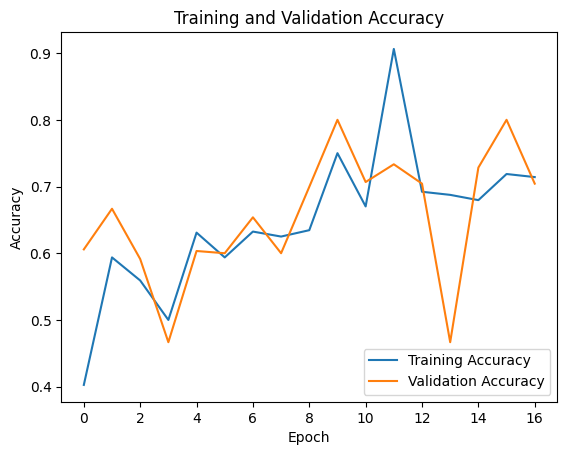

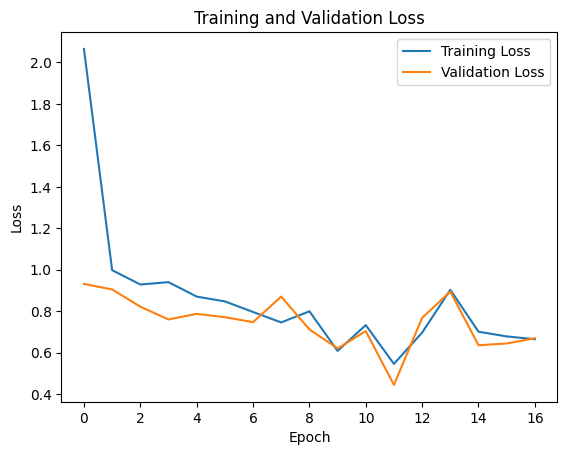

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Actual: Crack, Predicted: paint-off, Confidence: 0.51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Actual: Missing Head, Predicted: missing-head, Confidence: 0.72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Actual: Paint Off, Predicted: paint-off, Confidence: 0.46


In [ ]:
# AER 850  Project 2
# Author: Kirat Kaur
# Student No: 501125524

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Data Processing

image_size = (500, 500)
batch_size = 32

# Directories for training, validation, and testing data

train_dir = '/content/drive/MyDrive/Colab Notebooks/Project 02; AER 850/Data/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/Project 02; AER 850/Data/valid'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Project 02; AER 850/Data/test'

# Image data generators with augmentation for training and simple scaling for validation/testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Creating generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

# Retrieving class names based on directory structure
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

# Step 2: Neural Network Architecture Design
model = models.Sequential()

# First Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and adding Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))                    # Dropout to reduce overfitting
model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Model Training and Evaluation with Early Stopping

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  ## early stopping

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

# Plots for training & validation accuracy, and loss

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Step 5: Model Testing
# Preprocess test image
def preprocess_test_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize image
    return np.expand_dims(img_array, axis=0)

# List of test images and their corresponding class names
test_images = {
    "Crack": '/content/drive/MyDrive/Colab Notebooks/Project 02; AER 850/Data/test/crack/test_crack.jpg',
    "Missing Head": '/content/drive/MyDrive/Colab Notebooks/Project 02; AER 850/Data/test/missing-head/test_missinghead.jpg',
    "Paint Off": '/content/drive/MyDrive/Colab Notebooks/Project 02; AER 850/Data/test/paint-off/test_paintoff.jpg'
}

# Predict and display results for each test image
for class_label, img_path in test_images.items():
    test_img = preprocess_test_image(img_path)
    prediction = model.predict(test_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_names[predicted_class]

    # Display the prediction result
    print(f"Actual: {class_label}, Predicted: {predicted_label}, Confidence: {prediction[0][predicted_class]:.2f}")
